# Gradient Descent 의 단점 해결 방안들에 대해 알아보겠습니다.

## 오늘 다룰 내용은 SGD, SGD with momentum, AdaGrad, RMSprop, Adam입니다.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

 우선 함수는 아래와 같이 주어집니다. 

In [2]:
def f(x):
    return x[0]**2/20 + x[1]**2

위 함수의 최소값과 최소값을 만드는 입력값은 무엇입니까?

정답) x[0] = 0, x[1] = 0

위 함수의 3D wireframe과 2D Contour를 그리는 함수를 완성합니다.

In [3]:
def plot_points_on_contour(f,points=None):
    fig = plt.figure(figsize=(15,5))

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    x = [np.linspace(-10,10,100), np.linspace(-10,10,100)]

    X = np.meshgrid(x[0],x[1])
    Z = f(X)


    # Plot a basic wireframe.
    ax1.plot_wireframe(X[0],X[1],Z)
    ax1.view_init(30,200)
    
    ax2.contour(X[0],X[1],Z,30)

    if points is not None:
        ax2.plot(points[0],points[1],'o',ls='-')
    
    plt.show()

함수 f만 입력시 wireframe과 contour 그림이 출력됩니다.

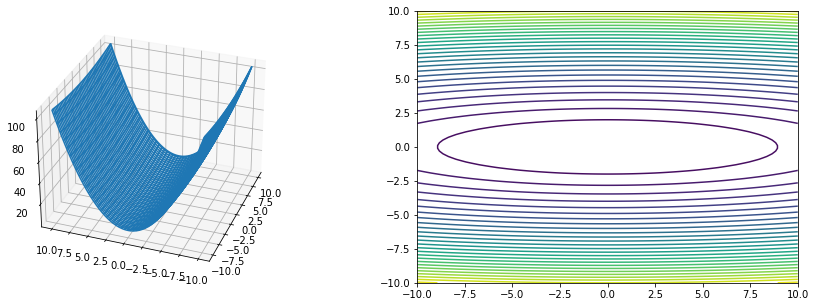

In [4]:
plot_points_on_contour(f)

함수와 각 점의 x,y축을 입력하면 그 부분이 contour 그림에 표시됩니다.

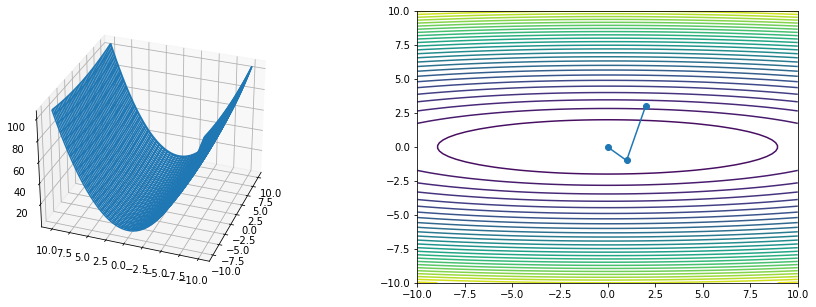

In [5]:
plot_points_on_contour(f, [[0,1,2],[0,-1,3]])

## 각가의 방식으로 주어진 함수를 최소로 만드는 x,y값을 찾아봅시다.

즉 위에서 계산한 입력값 x,y를 각 방법으로 찾을 수 있어야 합니다. 

아래 함수 GD는 함수, torch.Tensor 객체, learning_rate, num_step 를 입력으로 받아 3D wireframe과 2D contour에 x값이 어떻게 변화는지를 표시하여줍니다.

In [6]:
def GD(f,init_x, learning_rate, num_step):

    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        loss = f(init_x)
        loss.backward()

        with torch.no_grad():
            init_x -= learning_rate*init_x.grad

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])
    

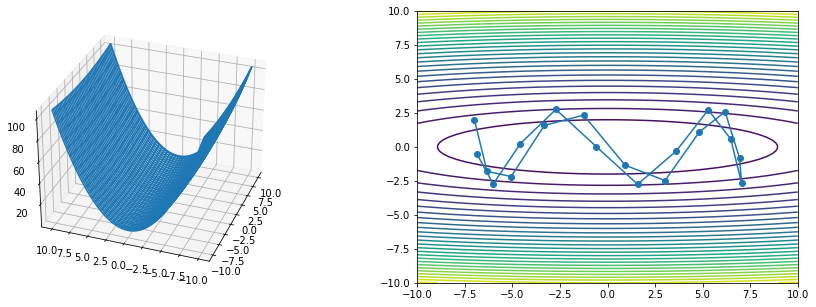

In [9]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD(f,x,.95, 20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 학습 속도는 학습의 성공 여부를 결정하는 요인이다. 너무 큰 값으로 학습 속도를 설정하면, 특정 값으로 수렴하지 못해서 학습이 이뤄지지 않고, 너무 작은 값으로 설정하면 학습이 완료되기까지 상당 시간이 소요된다.

아래 함수 GD_momentum는 함수, torch.Tensor 객체, learning_rate, num_step, momentum 계수를 입력으로 받아 3D wireframe과 2D contour에 x값이 어떻게 변화는지를 표시하여줍니다.

In [92]:
def GD_momentum(f, init_x, learning_rate, num_step, mom):

    v = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        loss = f(init_x)
        loss.backward()
        
        with torch.no_grad():
            v = mom * v - learning_rate * init_x.grad
            init_x += v
         

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])
    

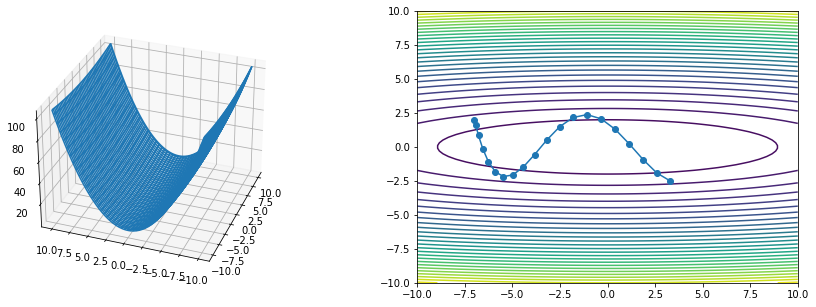

In [93]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD_momentum(f,x,.1, 20, 0.1)

 위 결과에 learning_rate와 초기값, 모멘텀 계수을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) learning rate는 학습의 속도를 조절함과 동시에 적절한 값이 설정되어야 학습이 진행되는 특성이 있다. 그리고 초기값은 학습이 진행되는 방향에 영향을 주며, 학습 시간의 정도를 좌우한다. 마지막으로 모멘텀 계수는 학습이 진행되는 방향에 관성을 적용하여 학습 과정에서 loss 값이 완만하게 연결되도록 한다.

In [94]:
def GD_AdaGrad(f, init_x, learning_rate, num_step):

    h = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        loss = f(init_x)
        loss.backward()


        with torch.no_grad():
            h = h + (init_x.grad)**2
            init_x -= learning_rate * init_x.grad/(h**0.5)
         
            # 채우시오

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])

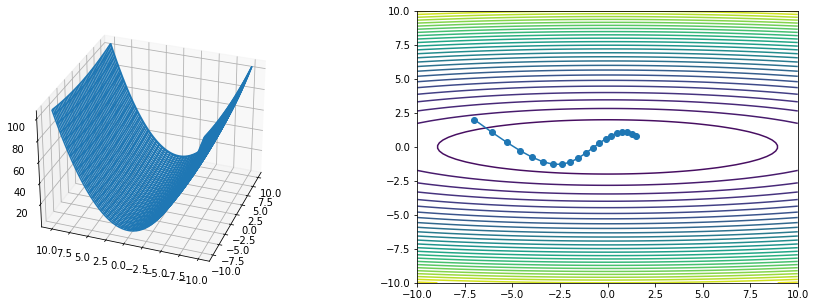

In [95]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD_AdaGrad(f,x,.9, 20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) AdaGrad를 이용하게 되면, 시간이 지남에 따라 학습 속도가 감소하여 학습이 실패하는 경우를 배제시켜준다. 그리고 학습 속도가 감소하여 원하는 값을 찾기에 좀 더 수월한 특징이 있다.

In [96]:
def GD_RMSprop(f,init_x, learning_rate, num_step, gamma):

    g = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        loss = f(init_x)
        loss.backward()


        with torch.no_grad():
            g = gamma * g + (1-gamma) * (init_x.grad)**2
            init_x -= learning_rate * (init_x.grad)/(g**0.5)
         

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])

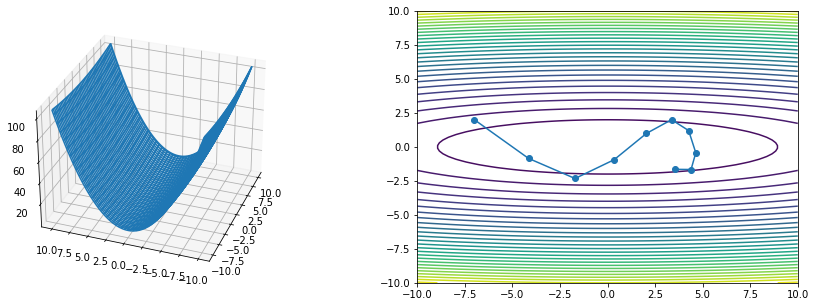

In [97]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD_RMSprop(f,x,.9, 10, 0.9)


 위 결과에 learning_rate와 초기값, gamma 을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) gamma 값의 크기의 변화에 따라 학습이 진행되는 정도가 커지고, 시간이 지날수록 감소하여 학습이 끝날 쯤에는 변동폭이 감소한다.

In [98]:
def GD_Adam(f,init_x, learning_rate, num_step, beta_1, beta_2):

    m = 0
    v = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        loss = f(init_x)
        loss.backward()


        with torch.no_grad():
            m = beta_1 * m + (1-beta_1) * init_x.grad
            v = beta_2 * v + (1-beta_2) * (init_x.grad)**2
            m_hat = m / (1-beta_1**(i+1))
            v_hat = v / (1-beta_2**(i+1))
            init_x = init_x-m_hat*learning_rate / (v_hat+1e-8)**0.5
        

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])

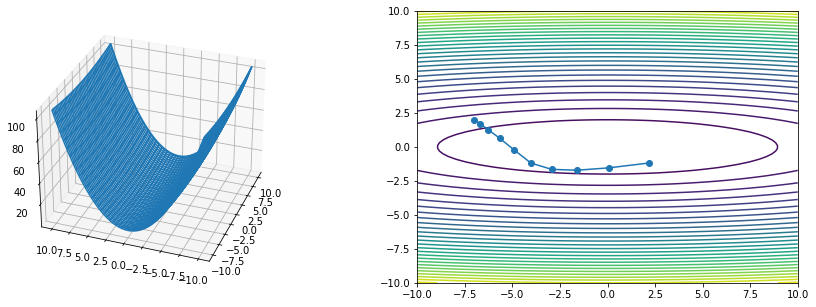

In [99]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD_Adam(f,x,0.9, 10, 0.8, 0.5)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) Adam은 AdaGrad와 Momentum을 합성한 방법이고, 학습 진행 과정에 관성을 적용하여 완만하게 학습이 이뤄지게 하며, 시간이 지남에 따라 특정한 값으로 수렴할 수 있도록 learning rate가 감소하는 특징이 있다.

## 새로운 함수에 대해 위 작업을 반복해보자

In [100]:
def g(x):
    return x[0]**4 + x[1]**4 + 5*x[0]**3  - 40*(x[0]-1)**2 - 40*(x[1]-1)**2

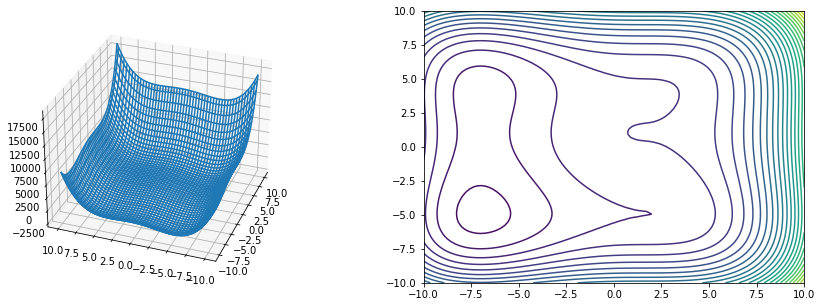

In [101]:
plot_points_on_contour(g)

위 함수의 최소값를 갖는 입력값은 대략 어디인가?

정답) [-5, -7]

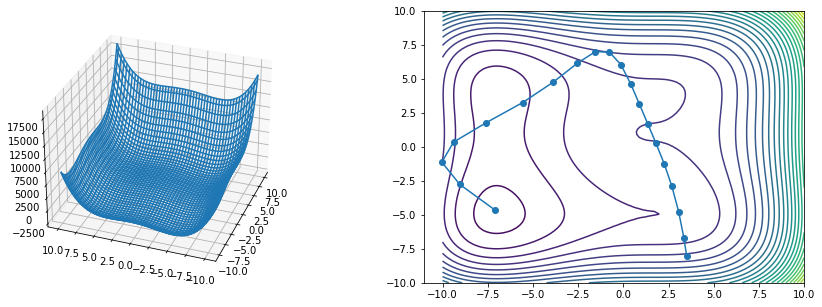

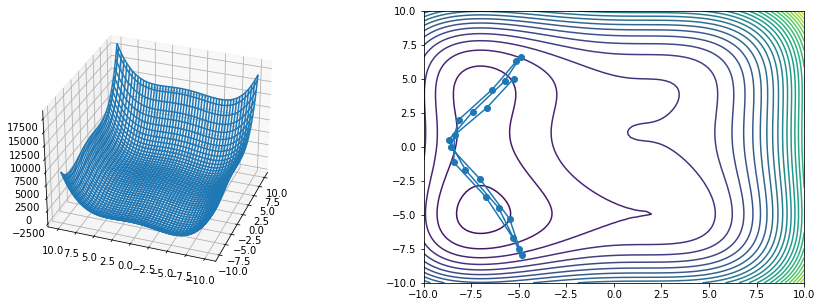

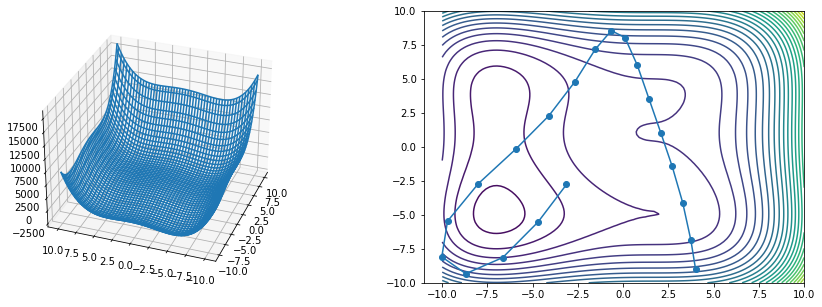

In [102]:
x = torch.tensor([3.5,-8], requires_grad = True, dtype=torch.float32)

GD(g,x,.001,20)

x = torch.tensor([-5,-7.5], requires_grad = True, dtype=torch.float32)

GD(g,x,.003,20)

x = torch.tensor([4,-9], requires_grad = True, dtype=torch.float32)

GD(g,x,.001,20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 학습 속도는 학습의 성공 여부를 결정하는 요인이다. 너무 큰 값으로 학습 속도를 설정하면, 특정 값으로 수렴하지 못해서 학습이 이뤄지지 않고, 너무 작은 값으로 설정하면 학습이 완료되기까지 상당 시간이 소요된다.

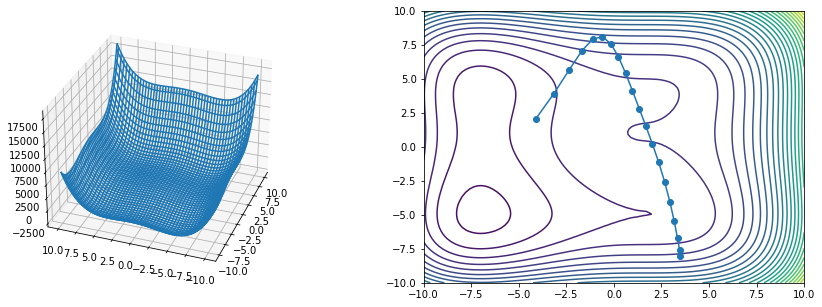

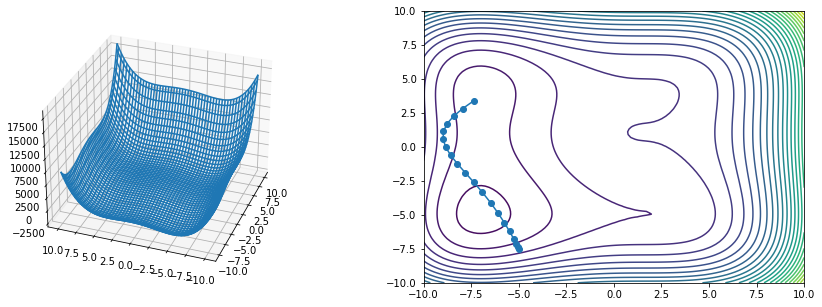

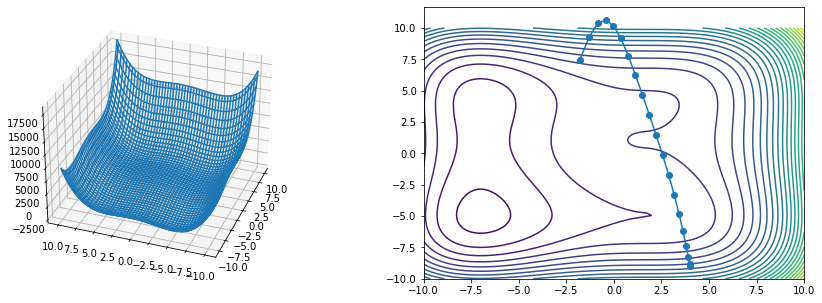

In [103]:
x = torch.tensor([3.5,-8], requires_grad = True, dtype=torch.float32)
GD_momentum(g,x,.0003,20,.4)

x = torch.tensor([-5,-7.5], requires_grad = True, dtype=torch.float32)

GD_momentum(g,x,.0001,20,.5)

x = torch.tensor([4,-9], requires_grad = True, dtype=torch.float32)

GD_momentum(g,x,.0001,20,.6)

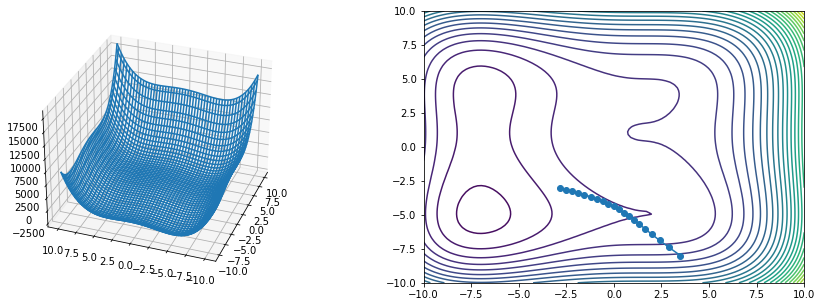

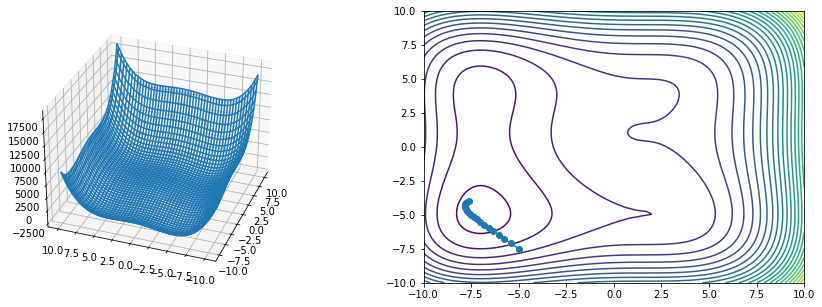

In [104]:
x = torch.tensor([3.5,-8], requires_grad = True, dtype=torch.float32)

GD_AdaGrad(g,x,.6,20)

x = torch.tensor([-5,-7.5], requires_grad = True, dtype=torch.float32)

GD_AdaGrad(g,x,.4,20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 적절한 learning_rate와 초기값을 설정해야 불필요한 학습이 줄여주며, 학습이 진행될 수 있게 해준다. 따라서 알맞은 초기값과 learning_rate를 설정해야 한다.

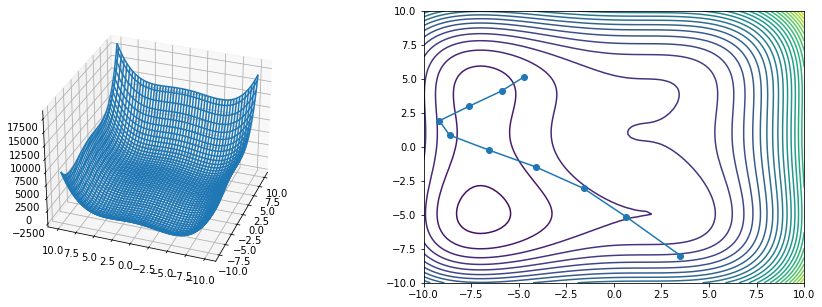

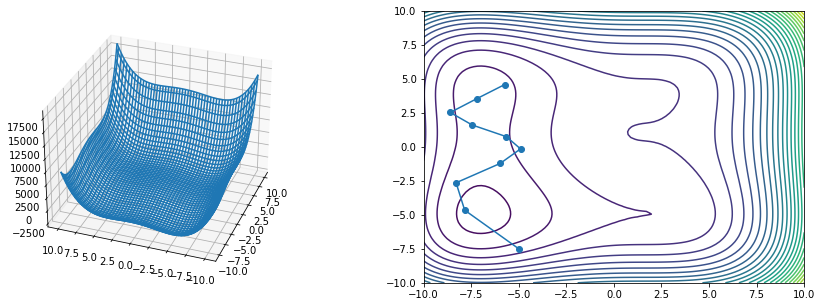

In [106]:
x = torch.tensor([3.5,-8], requires_grad = True, dtype=torch.float32)

GD_RMSprop(g,x,.9, 10, 0.9)


x = torch.tensor([-5,-7.5], requires_grad = True, dtype=torch.float32)

GD_RMSprop(g,x,.9,10,.9)


 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) gamma 값의 크기의 변화에 따라 학습이 진행되는 정도가 커지고, 시간이 지날수록 감소하여 학습이 끝날 쯤에는 변동폭이 감소한다.

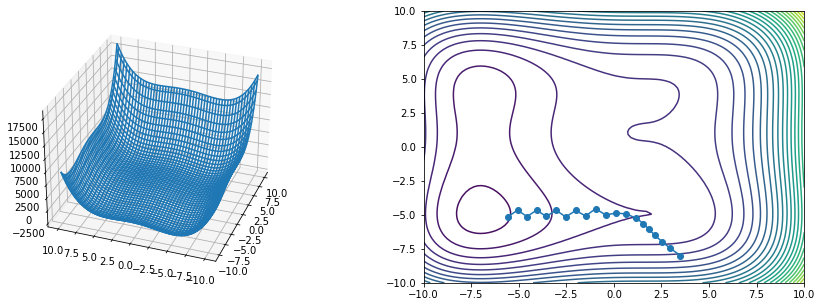

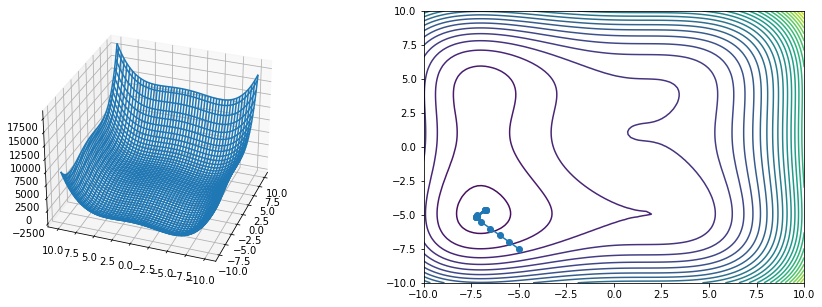

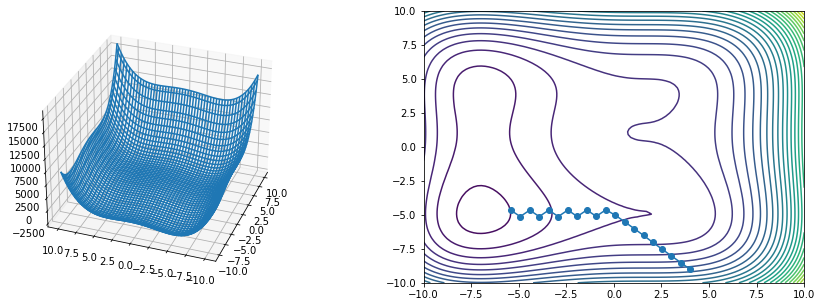

In [108]:
x = torch.tensor([3.5,-8], requires_grad = True, dtype=torch.float32)

GD_Adam(g,x,.5,20,.03,.2)


x = torch.tensor([-5,-7.5], requires_grad = True, dtype=torch.float32)

GD_Adam(g,x,.5,20,.03,.03)


x = torch.tensor([4,-9], requires_grad = True, dtype=torch.float32)

GD_Adam(g,x,.5,20,.03,.03)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) Adam은 AdaGrad와 Momentum을 합성한 방법이고, 학습 진행 과정에 관성을 적용하여 완만하게 학습이 이뤄지게 하며, 시간이 지남에 따라 특정한 값으로 수렴할 수 있도록 learning rate가 감소하는 특징이 있다. 그리고 위에 그래프에서 볼 수 있듯이 학습 과정이 일정한 규칙이 있는 것처럼 진행될 수 있다